<a href="https://colab.research.google.com/github/Onehundredpunches/AI_W4_24_02_23/blob/main/ProtACE_20146417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9367db54cab34bc5d0ab50894b36d35bbc36f2ac7cc827b3c970ddc87b0a347a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


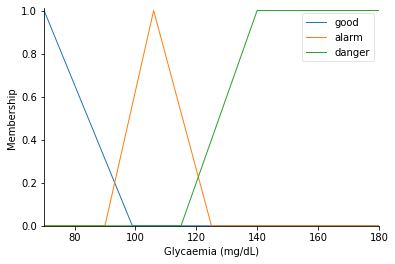

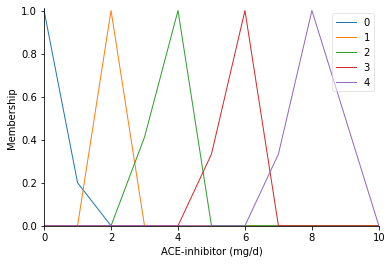

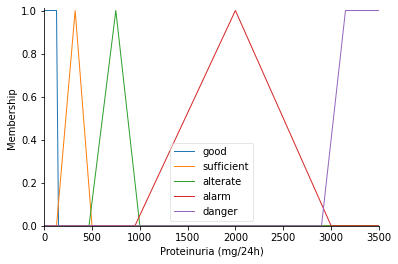

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

Glycaemia_Level = ctrl.Antecedent(np.arange(70,180.1,1),'Glycaemia (mg/dL)')
DiffACE = ctrl.Antecedent(np.arange(0,10.1,1),'ACE‐inhibitor (mg/d)')
Proteinuria_Level = ctrl.Consequent(np.arange(0,3500.1,1),'Proteinuria (mg/24h)')


Glycaemia_Level['good'] = fuzz.trimf(Glycaemia_Level.universe,[70,70,99])
Glycaemia_Level['alarm'] = fuzz.trimf(Glycaemia_Level.universe,[90,106,125])
Glycaemia_Level['danger'] = fuzz.trapmf(Glycaemia_Level.universe,[115,140,180,180])

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[0,0,1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[1,2,2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[2.3,4,5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[4.5,6,7])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[6.5,8,10])

Proteinuria_Level['good'] = fuzz.trapmf(Proteinuria_Level.universe,[0,0,130,150])
Proteinuria_Level['sufficient'] = fuzz.trimf(Proteinuria_Level.universe,[130,325,500])
Proteinuria_Level['alterate'] = fuzz.trimf(Proteinuria_Level.universe,[470,750,1000])
Proteinuria_Level['alarm'] = fuzz.trimf(Proteinuria_Level.universe,[950,2000,3000])
Proteinuria_Level['danger'] = fuzz.trapmf(Proteinuria_Level.universe,[2900,3150,3500,3500])

Glycaemia_Level.view()
DiffACE.view()
Proteinuria_Level.view()


In [ ]:
# follow table 3:
rule1 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['2'], Proteinuria_Level['sufficient'])
rule2 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['1'], Proteinuria_Level['sufficient'])
rule3 = ctrl.Rule(Glycaemia_Level['alarm'] & DiffACE['1'], Proteinuria_Level['alterate'])
rule4 = ctrl.Rule(Glycaemia_Level['danger'] & DiffACE['1'], Proteinuria_Level['alarm'])
rule5 = ctrl.Rule(Glycaemia_Level['alarm'] & DiffACE['3'], Proteinuria_Level['alarm'])
rule6 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['3'], Proteinuria_Level['alterate'])
rule7 = ctrl.Rule(Glycaemia_Level['danger'] & DiffACE['4'], Proteinuria_Level['danger'])
rule8 = ctrl.Rule(Glycaemia_Level['good'] & DiffACE['0'], Proteinuria_Level['good'])

Proteinuria_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,
                                   rule8])

Proteinuria = ctrl.ControlSystemSimulation(Proteinuria_ctrl)



737.1850809289241


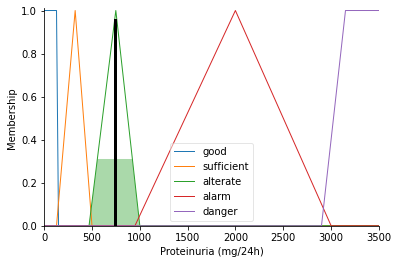

In [ ]:
Proteinuria.input['Glycaemia (mg/dL)'] = 90
Proteinuria.input['ACE‐inhibitor (mg/d)'] = 5
Proteinuria.compute()
print(Proteinuria.output['Proteinuria (mg/24h)'])
Proteinuria_Level.view(sim=Proteinuria)